In [1]:
#@title Connect to FNS { display-mode: "code" }
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -q requests
!pip install -q beautifulsoup4
!pip install yfinance --upgrade --no-cache-dir
!pip install scipy

In [3]:
import requests
from bs4 import BeautifulSoup
import csv
import pip
import yfinance as yf

# Scraping/Regular expression
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import scipy
# General data science
from datetime import date, timedelta,datetime
import pandas as pd
# File Management
import os
#Ideal to move files between 2 different discs
import sqlite3 as sq
# Supporting Packages
import sys

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [4]:
# Creates a log file
log = open("scraper_logs.log", "a+", encoding="utf-8")
sys.stdout = log


In [54]:
import sqlite3

def list_tables(db_name):
    try:
        # Connect to SQLite database
        conn = sqlite3.connect(db_name)
        cursor = conn.cursor()

        # Query sqlite_master table to get table names
        cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
        tables = cursor.fetchall()

        # Print the table names
        print("Tables in the database:")
        for table in tables:
            print(table[0])

        # Close connection
        #conn.close()

    except sqlite3.Error as e:
        print("SQLite Error:", e)

# Specify your database name here
db_name = "/content/drive/MyDrive/workspace/containers/radius_research/warrants_dashboard_V1/DB/warrants_dashboard.db"

# Assuming you have uploaded the database file to your Colab instance
list_tables(db_name)


In [58]:
#@title  Connect { display-mode: "code" }
path = "/content/drive/MyDrive/workspace/containers/radius_research/warrants_dashboard_V1/db/"   #@param {type: 'string'
database = "warrants_dashboard.db" #@param {type: 'string'
conn_SQLite = sq.connect(path+database)

# Import ID

##Refinitiv

In [8]:
import pandas as pd
from datetime import datetime
import pytz

# Specify the path to your CSV file
file_path = '/content/drive/MyDrive/workspace/containers/radius_research/warrants_dashboard_V1/raw_data/canadian_warrants/refinitiv/can_warrants_clean.csv'

# Read the CSV file into a DataFrame
df_Refinitiv = pd.read_csv(file_path)

# Get the current timestamp in UTC
request_time_utc = datetime.now(pytz.utc)

# Define the Eastern Timezone
est_timezone = pytz.timezone('America/New_York')

# Convert the timestamp to Eastern Time
request_time_est = request_time_utc.astimezone(est_timezone).strftime('%Y-%m-%d %H:%M:%S')

# Add a new column 'upload_time' with the upload time in EST
df_Refinitiv['upload_time'] = request_time_est
df_Refinitiv['listing_date']= ''

In [59]:
table_name = "refinitiv_warrants"


df_Refinitiv.to_sql(table_name, conn_SQLite, if_exists='replace', index=False) # writes to file
conn_SQLite.commit()

# Just be sure any changes have been committed or they will be lost.

df = pd.read_sql("""
select *
from {}


""".format(table_name), conn_SQLite)
df

,Name,Underlying RIC,Underlying Issuer,Issuer,Warrant/Certificate Type,Put / Call,Expiry Date,Strike Price,ISIN,Issuer Country,warrant_ticker,ceo_ca_link,Yahoo_finance_link,Yahoo_ID,Comment
0,Jasper Commerce Equity Warrants Exp 16th Feb 2024,JPIM.V,Jasper Commerce Inc,Jasper Commerce Inc,Company Warrant,Call,2024-02-16,0.7,CA47157P1146,Canada,JPIM,https://ceo.ca/jpim-wt,https://ca.finance.yahoo.com/quote/jpim.v?.tsr...,JPIM.V,None
1,MediPharm Labs Equity Warrants Exp 26 Feb 2024,LABS.TO,Medipharm Labs Corp,Medipharm Labs Corp,Company Warrant,Call,2024-02-26,0.26,CA58504D1428,Canada,LABS,https://ceo.ca/labs-wt,https://ca.finance.yahoo.com/quote/labs.to?.ts...,LABS.TO,Halted
2,Star Royalties Equity Warrants Exp 19th Feb 2024,STRR.V,Star Royalties Ltd,Star Royalties Ltd,Company Warrant,Call,2024-02-19,1,CA8551691162,Canada,STRR,https://ceo.ca/strr-wt,https://ca.finance.yahoo.com/quote/strr.v?.tsr...,STRR.V,None
3,Deveron Equity Warrants Exp 25th Feb 2024,FARM.V,Deveron Corp,Deveron Corp,Company Warrant,Call,2024-02-25,0.9,CA25162L1206,Canada,FARM,https://ceo.ca/farm-wt,https://ca.finance.yahoo.com/quote/farm.v?.tsr...,FARM.V,None
4,High Tide Equity Warrants Exp 23rd Feb 2024,HITI.V,High Tide Inc,High Tide Inc,Company Warrant,Call,2024-02-23,0.58,CA42981E1381,Canada,HITI,https://ceo.ca/hiti-wt,https://ca.finance.yahoo.com/quote/hiti.v?.tsr...,HITI.V,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,Erste Bank der Oesterreichischen Sparkassen AG...,.SBOXKROA,None,Lafayette Paper Mills Ltd,Investment Certificate,None,None,--,AT0000A04P91,Canada,#NAME?,https://ceo.ca/-sboxkroa-wt,https://ca.finance.yahoo.com/quote/.sboxkroa?....,None,Investigate
141,Raiffeisen Centrobank AG ZT SPORTWETTEN Idx 31...,.SBOXSW,None,Lafayette Paper Mills Ltd,Investment Certificate,None,None,--,AT0000A02YF0,Canada,#NAME?,https://ceo.ca/-sboxsw-wt,https://ca.finance.yahoo.com/quote/.sboxsw?.ts...,None,Investigate
142,Raiffeisen Centrobank Call S-BOX Alternative E...,.SBOXAE,None,Lafayette Paper Mills Ltd,Investment Certificate,None,None,--,AT0000A05402,Canada,#NAME?,https://ceo.ca/-sboxae-wt,https://ca.finance.yahoo.com/quote/.sboxae?.ts...,None,Investigate
143,Royal Bank of Canada ZT US Equity Intraday Mom...,None,None,Royal Bank of Canada,Warrant,None,None,--,XS0846768884,Canada,None,None,None,None,Investigate


In [10]:
import pandas as pd

# Specify the path to your CSV file
file_path = '/content/drive/MyDrive/workspace/containers/radius_research/warrants_dashboard_V1/raw_data/canadian_warrants/refinitiv/can_warrants_clean.csv'

df_Refinitiv = pd.read_csv(file_path)

df_Refinitiv

,Name,Underlying RIC,Underlying Issuer,Issuer,Warrant/Certificate Type,Put / Call,Expiry Date,Strike Price,ISIN,Issuer Country,warrant_ticker,ceo_ca_link,Yahoo_finance_link,Yahoo_ID,Comment
0,Jasper Commerce Equity Warrants Exp 16th Feb 2024,JPIM.V,Jasper Commerce Inc,Jasper Commerce Inc,Company Warrant,Call,2024-02-16,0.7,CA47157P1146,Canada,JPIM,https://ceo.ca/jpim-wt,https://ca.finance.yahoo.com/quote/jpim.v?.tsr...,JPIM.V,NaN
1,MediPharm Labs Equity Warrants Exp 26 Feb 2024,LABS.TO,Medipharm Labs Corp,Medipharm Labs Corp,Company Warrant,Call,2024-02-26,0.26,CA58504D1428,Canada,LABS,https://ceo.ca/labs-wt,https://ca.finance.yahoo.com/quote/labs.to?.ts...,LABS.TO,Halted
2,Star Royalties Equity Warrants Exp 19th Feb 2024,STRR.V,Star Royalties Ltd,Star Royalties Ltd,Company Warrant,Call,2024-02-19,1,CA8551691162,Canada,STRR,https://ceo.ca/strr-wt,https://ca.finance.yahoo.com/quote/strr.v?.tsr...,STRR.V,NaN
3,Deveron Equity Warrants Exp 25th Feb 2024,FARM.V,Deveron Corp,Deveron Corp,Company Warrant,Call,2024-02-25,0.9,CA25162L1206,Canada,FARM,https://ceo.ca/farm-wt,https://ca.finance.yahoo.com/quote/farm.v?.tsr...,FARM.V,NaN
4,High Tide Equity Warrants Exp 23rd Feb 2024,HITI.V,High Tide Inc,High Tide Inc,Company Warrant,Call,2024-02-23,0.58,CA42981E1381,Canada,HITI,https://ceo.ca/hiti-wt,https://ca.finance.yahoo.com/quote/hiti.v?.tsr...,HITI.V,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,Erste Bank der Oesterreichischen Sparkassen AG...,.SBOXKROA,NaN,Lafayette Paper Mills Ltd,Investment Certificate,NaN,NaN,--,AT0000A04P91,Canada,#NAME?,https://ceo.ca/-sboxkroa-wt,https://ca.finance.yahoo.com/quote/.sboxkroa?....,NaN,Investigate
141,Raiffeisen Centrobank AG ZT SPORTWETTEN Idx 31...,.SBOXSW,NaN,Lafayette Paper Mills Ltd,Investment Certificate,NaN,NaN,--,AT0000A02YF0,Canada,#NAME?,https://ceo.ca/-sboxsw-wt,https://ca.finance.yahoo.com/quote/.sboxsw?.ts...,NaN,Investigate
142,Raiffeisen Centrobank Call S-BOX Alternative E...,.SBOXAE,NaN,Lafayette Paper Mills Ltd,Investment Certificate,NaN,NaN,--,AT0000A05402,Canada,#NAME?,https://ceo.ca/-sboxae-wt,https://ca.finance.yahoo.com/quote/.sboxae?.ts...,NaN,Investigate
143,Royal Bank of Canada ZT US Equity Intraday Mom...,NaN,NaN,Royal Bank of Canada,Warrant,NaN,NaN,--,XS0846768884,Canada,NaN,NaN,NaN,NaN,Investigate


## Canadian Warrants

##CEO.ca

In [11]:
from urllib.request import urlopen, Request
from lxml import html
import pandas as pd
import time
from datetime import datetime
import pytz
from tqdm.notebook import tqdm

# Define the URL to scrape
urls = df_Refinitiv['ceo_ca_link'].dropna().tolist()

# Define the EST timezone
est_timezone = pytz.timezone('America/New_York')

# Initialize an empty list to store scraped data
data_list = []

# Loop over the URLs
for url in tqdm(urls[:5]):
    # Get HTML using user agent
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    html_content = urlopen(req).read()

    # Parse the HTML content using lxml
    tree = html.fromstring(html_content)

    # Extracting data from the page
    # Sample extraction, you may need to adjust the XPaths according to the structure of the webpage
    name_element = tree.xpath('//*[@id="container"]/div[3]/div[2]/div/div')
    warrant_name = name_element[0].text.strip() if name_element else "Not found"

    price_element = tree.xpath('//*[@id="chart-box"]/div/div[1]/div/div[2]/span[1]')

    if price_element and price_element[0] is not None:
        last_price = price_element[0].text.strip()
    else:
        continue


    percent_element = tree.xpath('//*[@id="chart-box"]/div/div[1]/div/div[2]/span[2]/span[2]')
    percent_return = percent_element[0].text.strip() if percent_element else "Not found"

    status_element = tree.xpath('//*[@id="chart-box"]/div/div[1]/div/div[2]/div[2]/div')
    trade_status = status_element[0].text.strip() if status_element else "Not found"

    shorts_element = tree.xpath('//*[@id="open-short-positions"]')
    shorts = shorts_element[0].text.strip().replace(',', '') if shorts_element else "Not found"
    shorts = 'na'

    shares_element = tree.xpath('//*[@id="chart-box"]/div/div[4]/div/div[1]/div[2]/span[1]')
    shares = shares_element[0].text.strip().replace('.', '').replace(',', '').replace('M', '0000').replace(' ', '').replace('$', '') if shares_element else "Not found"

    market_cap_element = tree.xpath('//*[@id="chart-box"]/div/div[4]/div/div[1]/div[1]/span[1]')
    market_capitalization = market_cap_element[0].text.strip().replace('.', '').replace(',', '').replace('M', '0000').replace(' ', '').replace('$', '') if market_cap_element else "Not found"

    tsx_volume_element = tree.xpath('//*[@id="chart-box"]/div/div[4]/div/div[2]/div[1]/span[1]')
    tsx_volume = tsx_volume_element[0].text.strip().replace('.', '').replace(',', '').replace('M', '0000').replace(' ', '').replace('$', '') if tsx_volume_element else "Not found"

    avg_volume_element = tree.xpath('//*[@id="chart-box"]/div/div[4]/div/div[2]/div[2]/span[1]')
    avg_volume = avg_volume_element[0].text.strip().replace('.', '').replace(',', '').replace('M', '0000').replace(' ', '').replace('$', '') if avg_volume_element else 0

    # Timestamp of the request in EST with second precision
    request_time_utc = datetime.now(pytz.utc)
    request_time_est = request_time_utc.astimezone(est_timezone).strftime('%Y-%m-%d %H:%M:%S')

    # Extract warrant_ticker and underlying_ticker from the URL
    warrant_ticker = url.replace("https://ceo.ca/", "").upper()
    underlying_ticker = warrant_ticker.replace("-WT", "").upper()

    # Calculate dollars_volume
    if last_price != "Not found" and avg_volume != "Not found" and avg_volume != "":
        dollars_volume = float(last_price) * float(avg_volume)
    else:
        dollars_volume = "Not found"


    # Append the extracted data to the list
    data_list.append([warrant_ticker, underlying_ticker, warrant_name, last_price, percent_return, trade_status, shorts, shares, market_capitalization, tsx_volume, avg_volume, dollars_volume,url, 'CEO.ca', request_time_est])

    # Delay for 5 seconds before making the next request
    time.sleep(1)

# Create a DataFrame from the collected data
columns = ['warrant_ticker', 'underlying_ticker', 'warrant_name', 'last_price', 'percent_return', 'trade_status', 'shorts', 'shares', 'market_capitalization', 'tsx_volume', 'avg_volume', 'dollars_volume','URL', 'source', 'request_time_est']
df_ceo = pd.DataFrame(data_list, columns=columns)

df_ceo.to_csv('df_ceo.csv', index=False)
df_ceo


  0%|          | 0/5 [00:00<?, ?it/s]

,warrant_ticker,underlying_ticker,warrant_name,last_price,percent_return,trade_status,shorts,shares,market_capitalization,tsx_volume,avg_volume,dollars_volume,URL,source,request_time_est
0,JPIM-WT,JPIM,Jasper Commerce Inc.,0.005,0.0%,HALTED,na,58080000,290398,0,,Not found,https://ceo.ca/jpim-wt,CEO.ca,2024-03-13 14:37:50
1,LABS-WT,LABS,MediPharm Labs Corp. Common Share Purchase War...,0.005,0.0%,HALTED,na,397470000,1990000,0,67,0.335,https://ceo.ca/labs-wt,CEO.ca,2024-03-13 14:37:52
2,STRR-WT,STRR,Star Royalties Ltd.,0.005,0.0%,HALTED,na,74960000,374808,0,467,2.335,https://ceo.ca/strr-wt,CEO.ca,2024-03-13 14:37:54
3,FARM-WT,FARM,Deveron Corp.,0.025,0.0%,HALTED,na,156410000,3910000,0,,Not found,https://ceo.ca/farm-wt,CEO.ca,2024-03-13 14:37:55
4,HITI-WT,HITI,High Tide Inc.,0.005,0.0%,HALTED,na,91690000,458473,0,4233,21.165,https://ceo.ca/hiti-wt,CEO.ca,2024-03-13 14:37:57


##Stockhouse Scraper

#Store DB

In [60]:
table_name = "ceo_ca_warrants"


df_ceo .to_sql(table_name, conn_SQLite, if_exists='append', index=False) # writes to file
conn_SQLite.commit()

# Just be sure any changes have been committed or they will be lost.

df = pd.read_sql("""
select *
from {}


""".format(table_name), conn_SQLite)
df.to_csv('df_ceo.csv', index=False)

# Risk-free rate timeseries

In [43]:
import pandas as pd
import numpy as np

# Load the CSV file
data = pd.read_csv('/content/drive/MyDrive/workspace/containers/radius_research/warrants_dashboard_V1/raw_data/Canada_key_rate/rate_can.csv')

# Convert data to DataFrame
df = pd.DataFrame(data)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as index
df.set_index('Date', inplace=True)

# Sort DataFrame by index in ascending order
df.sort_index(inplace=True)

# Forward fill the target percentages
df['Target (%)'] = df['Target (%)'].ffill()

# Reset the index to get 'Date' back as a column
df.reset_index(inplace=True)

# Create a daily date range from the earliest to the latest date in the DataFrame
daily_dates = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='D')

# Merge the daily date range with the original DataFrame
daily_df = pd.DataFrame({'Date': daily_dates})
merged_df = pd.merge(daily_df, df, on='Date', how='left')

# Forward fill the target percentages for the daily DataFrame
merged_df['Target (%)'].fillna(method='ffill', inplace=True)

merged_df


,Date,Target (%)
0,2022-09-07,3.25
1,2022-09-08,3.25
2,2022-09-09,3.25
3,2022-09-10,3.25
4,2022-09-11,3.25
...,...,...
500,2024-01-20,5.00
501,2024-01-21,5.00
502,2024-01-22,5.00
503,2024-01-23,5.00


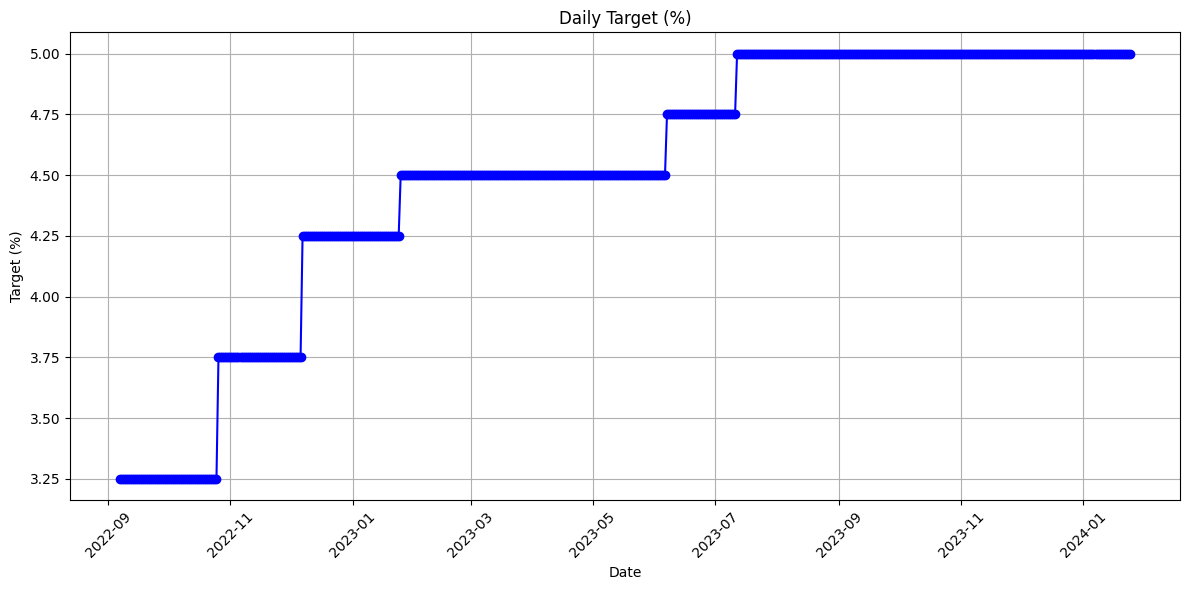

In [44]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['Target (%)'], color='blue', linestyle='-', marker='o')
plt.title('Daily Target (%)')
plt.xlabel('Date')
plt.ylabel('Target (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Yahoo Data

## Fundamentals

In [64]:

import yfinance as yf
import pandas as pd
from datetime import datetime

# List of Yahoo_ID symbols
Yahoo_ID_symbols = df_Refinitiv['Yahoo_ID']  # Example symbols, add more as needed

# Get the current date for the request
request_date = datetime.now().strftime('%Y-%m-%d')

# Create an empty list to store dataframes for each symbol
all_dataframes = []

# Loop over each Yahoo_ID symbol
for Yahoo_ID_symbol in tqdm(Yahoo_ID_symbols[0:5]):
    # Initialize Yahoo_ID object
    stock = yf.Ticker(Yahoo_ID_symbol)

    # Create a dictionary to store data
    data_dict = {'Yahoo_ID': [Yahoo_ID_symbol], 'request_date': [request_date]}

    # Get stock info
    stock_info = pd.DataFrame(stock.info)
    stock_info = stock_info[0:1]
    stock_info['Yahoo_ID'] = Yahoo_ID_symbol
    stock_info['request_date'] = request_date
    all_dataframes.append(stock_info)  # Append the dataframe to the list
    time.sleep(1)

# Concatenate all dataframes into a single dataframe
merged_fundamentals = pd.concat(all_dataframes, ignore_index=True)



merged_fundamentals.dtypes
merged_fundamentals.to_csv('/content/drive/MyDrive/workspace/containers/radius_research/warrants_dashboard_V1/raw_data/Yahoo_fundamentals/merged_fundamentals.csv', index=False)



100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


In [77]:
table_name = "fundamentals"

merged_fundamentals.to_sql(table_name, conn_SQLite, if_exists='replace', index=False) # writes to file
conn_SQLite.commit()

# Just be sure any changes have been committed or they will be lost.

df = pd.read_sql("""
select *
from {}


""".format(table_name), conn_SQLite)
df.head()

InterfaceError: Error binding parameter 14 - probably unsupported type.

## Historical Prices

In [78]:
import numpy as np
import yfinance as yf
import pandas as pd
from tqdm import tqdm
import time
from scipy.stats import norm



# List of ticker symbols
tickers = df_Refinitiv['Yahoo_ID'].tolist()

# Create an empty list to store DataFrames
dataframes = []

# Loop through each ticker symbol
for ticker in tqdm(tickers):
    # Retrieve historical data using yfinance
    data = yf.download(ticker, start='2023-01-01', end='2024-02-20')

    # Check if data is empty
    if not data.empty:
        # Define expiry date
        expiry_date = pd.to_datetime(df_Refinitiv[df_Refinitiv['Yahoo_ID'] == ticker]['Expiry Date'].values[0])
        strike_price = df_Refinitiv[df_Refinitiv['Yahoo_ID'] == ticker]['Strike Price'].values[0]

        # Calculate time to expiration in years
        data['Time to Expiration'] = (expiry_date - data.index).days / 365.0
        data['strike_price'] = strike_price

        # Define parameters for Black-Scholes calculation
        risk_free_rate = 0.05
        data['risk_free_rate'] = risk_free_rate
          # Example risk-free rate
        data['annualized_volatility'] = data['Close'].pct_change().rolling(window=30).std() * np.sqrt(252)  # Annualized volatility
        data['number_time_steps'] = 100



        # Calculate intrinsic value
        data['Close'] = pd.to_numeric(data['Close'], errors='coerce') # Convert 'Close' column to numeric
        data['strike_price'] = pd.to_numeric(strike_price, errors='coerce') # Convert 'strike_price' column to numeric

        data['intrinsic_value'] = data['Close'] - data['strike_price']


        #data['leverage'] = data['Close'] / strike_price





        # Add expiry date and days to expiry to the DataFrame
        data['Expiry_Date'] = expiry_date

        # Add a column to identify the ticker symbol
        data['Ticker'] = ticker

        data['dividend'] =  ""


        # Append the data to the list of DataFrames
        dataframes.append(data)
    else:
        print(f"No data available for {ticker}")

    time.sleep(1)

# Concatenate all DataFrames into a single DataFrame
historical_prices = pd.concat(dataframes)

# Reset index to make the DataFrame clean
historical_prices.reset_index(inplace=True)

# Display the DataFrame
historical_prices

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

AttributeError: 'float' object has no attribute 'replace'

In [61]:
table_name = "historical_daily_prices"


historical_prices.to_sql(table_name, conn_SQLite, if_exists='replace', index=False) # writes to file
conn_SQLite.commit()

# Just be sure any changes have been committed or they will be lost.

df = pd.read_sql("""
select *
from {}


""".format(table_name), conn_SQLite)
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Time to Expiration,strike_price,risk_free_rate,annualized_volatility,number_time_steps,intrinsic_value,Expiry_Date,Ticker,dividend
3687,2024-02-12 00:00:00,0.085,0.085,0.070,0.070,0.070,7000,0.131507,1.5,0.05,2.707880,100,-1.430,2024-03-31 00:00:00,CANS.V,
3688,2024-02-13 00:00:00,0.070,0.070,0.070,0.070,0.070,0,0.128767,1.5,0.05,2.699912,100,-1.430,2024-03-31 00:00:00,CANS.V,
3689,2024-02-14 00:00:00,0.070,0.070,0.070,0.070,0.070,1000,0.126027,1.5,0.05,2.683847,100,-1.430,2024-03-31 00:00:00,CANS.V,
3690,2024-02-15 00:00:00,0.070,0.070,0.070,0.070,0.070,0,0.123288,1.5,0.05,2.639627,100,-1.430,2024-03-31 00:00:00,CANS.V,
3691,2024-02-16 00:00:00,0.085,0.085,0.085,0.085,0.085,5000,0.120548,1.5,0.05,2.697743,100,-1.415,2024-03-31 00:00:00,CANS.V,


## Historical Dividends

#Valuation

## Black Scholes

##Binomial model

In [70]:
import numpy as np

def binomial_model(S, K, r, T, sigma, n):
    """
    Calculate the price of an American-style call option using the Binomial Model.

    Parameters:
        S (float): Current price of the underlying asset
        K (float): Strike price of the option
        r (float): Risk-free interest rate (annual)
        T (float): Time to expiration of the option (in years)
        sigma (float): Volatility of the underlying asset (annual)
        n (int): Number of time steps

    Returns:
        float: Price of the call option
    """
    dt = T / n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    # Initialize the stock price tree
    stock_tree = np.zeros((n + 1, n + 1))
    for i in range(n + 1):
        for j in range(i + 1):
            stock_tree[j, i] = S * (u ** (i - j)) * (d ** j)

    # Initialize the option value tree
    option_tree = np.zeros((n + 1, n + 1))
    for j in range(n + 1):
        option_tree[j, n] = max(0, stock_tree[j, n] - K)

    # Calculate option price at each node
    for i in range(n - 1, -1, -1):
        for j in range(i + 1):
            option_tree[j, i] = max(stock_tree[j, i] - K, np.exp(-r * dt) * (p * option_tree[j, i + 1] + (1 - p) * option_tree[j + 1, i + 1]))

    return option_tree[0, 0]



In [71]:
# Define the Black-Scholes call option pricing function
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price


## Probability Weighted Expected Return

In [76]:
import numpy as np
import yfinance as yf
import pandas as pd
from tqdm import tqdm
import time
from scipy.stats import norm


# List of ticker symbols
tickers = df_Refinitiv['Yahoo_ID'].tolist()

# Create an empty list to store DataFrames
dataframes = []

# Loop through each ticker symbol
for ticker in tqdm(tickers):
    # Retrieve historical data using yfinance
    data = yf.download(ticker, start='2023-01-01', end='2024-02-20')

    # Check if data is empty
    if not data.empty:
        # Define expiry date
        expiry_date = pd.to_datetime(df_Refinitiv[df_Refinitiv['Yahoo_ID'] == ticker]['Expiry Date'].values[0])
        strike_price = df_Refinitiv[df_Refinitiv['Yahoo_ID'] == ticker]['Strike Price'].values[0]

        # Calculate time to expiration in years
        data['Time to Expiration'] = (expiry_date - data.index).days / 365.0
        data['strike_price'] = strike_price

        # Define parameters for Black-Scholes calculation
        risk_free_rate = 0.05
        data['risk_free_rate'] = risk_free_rate
          # Example risk-free rate
        data['annualized_volatility'] = data['Close'].pct_change().rolling(window=30).std() * np.sqrt(252)  # Annualized volatility



        # Calculate intrinsic value
        data['Close'] = pd.to_numeric(data['Close'], errors='coerce') # Convert 'Close' column to numeric
        data['strike_price'] = pd.to_numeric(strike_price, errors='coerce') # Convert 'strike_price' column to numeric

        data['intrinsic_value'] = data['Close'] - data['strike_price']


        #data['leverage'] = data['Close'] / strike_price
        n = 100



        # Add expiry date and days to expiry to the DataFrame
        data['Expiry_Date'] = expiry_date

        # Add a column to identify the ticker symbol
        data['Ticker'] = ticker

        data['dividend'] =  ""


                # Calculate option price using Black-Scholes formula
        # Convert Series to arrays if needed
        S = data['Close'].values if isinstance(data['Close'], pd.Series) else data['Close']
        K = data['strike_price'].values if isinstance(data['strike_price'], pd.Series) else data['strike_price']
        r = data['risk_free_rate'].values if isinstance(data['risk_free_rate'], pd.Series) else data['risk_free_rate']
        T = data['Time to Expiration'].values if isinstance(data['Time to Expiration'], pd.Series) else data['Time to Expiration']
        sigma = data['annualized_volatility'].values if isinstance(data['annualized_volatility'], pd.Series) else data['annualized_volatility']

        data['binomial_model_pricing'] = binomial_model(S,K,r,T,sigma,n)

        data['black_scholes_pricing'] = black_scholes_call(data['Close'], strike_price, data['Time to Expiration'], risk_free_rate, data['annualized_volatility'])

        # Append the data to the list of DataFrames
        dataframes.append(data)
    else:
        print(f"No data available for {ticker}")

    time.sleep(1)

# Concatenate all DataFrames into a single DataFrame
historical_prices = pd.concat(dataframes)

# Reset index to make the DataFrame clean
historical_prices.reset_index(inplace=True)

# Display the DataFrame
historical_prices


[*********************100%%**********************]  1 of 1 completed
<ipython-input-70-3819badd8990>:21: RuntimeWarning: invalid value encountered in divide
  p = (np.exp(r * dt) - d) / (u - d)
  0%|          | 0/145 [00:00<?, ?it/s]


ValueError: setting an array element with a sequence.